<h1 align="center">Zewail City of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2020) </h2>
<h2 align="center">Lab 9: Introduction to Neural Networks </h2>
<h3 align="center">Prepared by: Aya Elzahy</h3>

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers

#House price dataset

Download link: https://drive.google.com/file/d/1GfvKA0qznNVknghV4botnNxyH-KvODOC/view

In [ ]:
df = pd.read_csv('housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


We have our input features in the first ten columns:

* Lot Area (in sq ft)
* Overall Quality (scale from 1 to 10)
* Overall Condition (scale from 1 to 10)
* Total Basement Area (in sq ft)
* Number of Full Bathrooms
* Number of Half Bathrooms
* Number of Bedrooms above ground
* Total Number of Rooms above ground
* Number of Fireplaces
* Garage Area (in sq ft)

In our last column, we have the feature that we would like to predict:

Is the house price above the median or not? (1 for yes and 0 for no)

##Divide into features and labels

In [ ]:
X= df.drop(columns='AboveMedianPrice', axis=1)
y= df['AboveMedianPrice']

##Normalization using min max scaling

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

##Train, test and validation split

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3, random_state=1)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state=1)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


#Neural network model using keras sequential

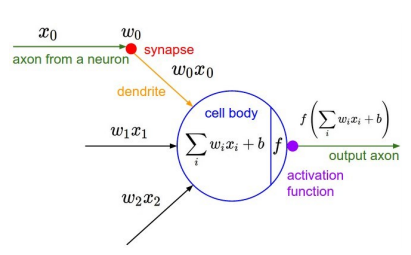

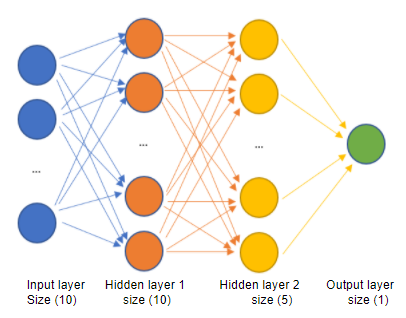

We create a Sequential model and add layers.

The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.

Fully connected layers are defined using the Dense class. 

We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.

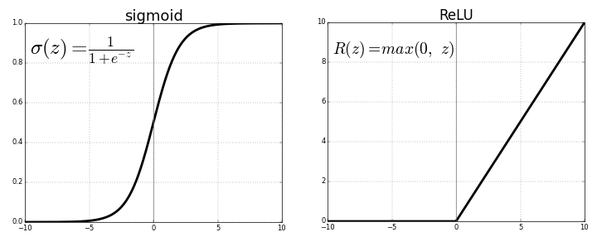

In [ ]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(10,)),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid'),
])

We must specify the loss function to use to evaluate a set of weights. The optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In this case, we will use cross entropy as the loss argument. This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“. 

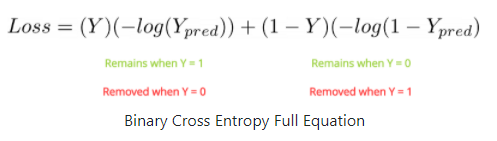

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

We can train or fit our model on our loaded data by calling the fit() function on the model.

Training occurs over epochs and each epoch is split into batches.

* Epoch: One pass through all of the rows in the training dataset.
* Batch: One or more samples considered by the model within an epoch before weights are updated.

One epoch is comprised of one or more batches, based on the chosen batch size and the model is fit for many epochs. 

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32,epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6960 - accuracy: 0.5000 - val_loss: 0.6939 - val_accuracy: 0.5205
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4990 - val_loss: 0.6928 - val_accuracy: 0.5297
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5215 - val_loss: 0.6914 - val_accuracy: 0.5297
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5431 - val_loss: 0.6886 - val_accuracy: 0.5753
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.6213 - val_loss: 0.6829 - val_accuracy: 0.7032
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.6810 - val_loss: 0.6778 - val_accuracy: 0.7215
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.6869 - val_loss: 0.6729 - val_accuracy: 0.7169
Epoch 8/100
3

In [ ]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2380 - accuracy: 0.8995


[0.2380218207836151, 0.8995434045791626]

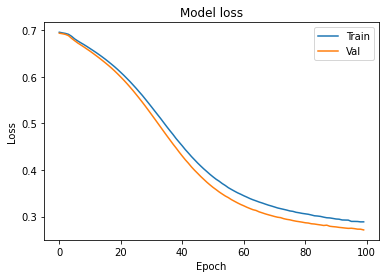

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

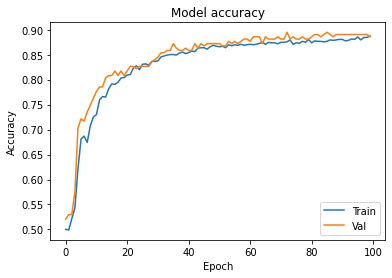

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#Overfitting in neural networks


In this model, we explore the effect of overfitting by adding more layers and neurons.

In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 40ms/step - loss: 0.4675 - accuracy: 0.7798 - val_loss: 0.3763 - val_accuracy: 0.8447
Epoch 2/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3566 - accuracy: 0.8474 - val_loss: 0.4155 - val_accuracy: 0.8402
Epoch 3/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3287 - accuracy: 0.8620 - val_loss: 0.2930 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2968 - accuracy: 0.8816 - val_loss: 0.3002 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2829 - accuracy: 0.8924 - val_loss: 0.2680 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2568 - accuracy: 0.9031 - val_loss: 0.2770 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2665 - accuracy: 0.8855 - val_loss: 0.2566 - val_accuracy: 0.8676
Epoch 

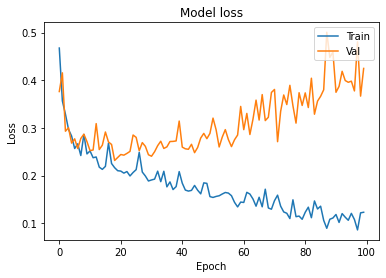

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

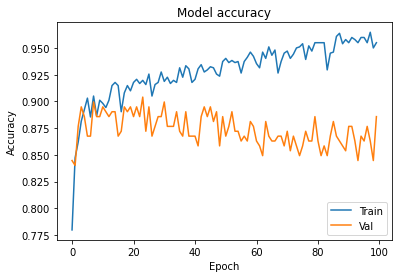

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#Regularization to prevent overfitting

In this model we regularize the model by: 
1. Adding L2 penalty 
2. Adding a dropout layer to decrease the complexity of the model (The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.)

In [ ]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 51ms/step - loss: 14.2158 - accuracy: 0.7104 - val_loss: 3.8653 - val_accuracy: 0.7397
Epoch 2/100
32/32 [==============================] - 1s 46ms/step - loss: 1.6506 - accuracy: 0.8366 - val_loss: 0.6303 - val_accuracy: 0.8767
Epoch 3/100
32/32 [==============================] - 1s 46ms/step - loss: 0.5655 - accuracy: 0.8669 - val_loss: 0.5473 - val_accuracy: 0.8402
Epoch 4/100
32/32 [==============================] - 1s 46ms/step - loss: 0.5198 - accuracy: 0.8708 - val_loss: 0.4691 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 2s 47ms/step - loss: 0.5187 - accuracy: 0.8581 - val_loss: 0.4745 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 1s 46ms/step - loss: 0.5274 - accuracy: 0.8454 - val_loss: 0.4731 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4771 - accuracy: 0.8777 - val_loss: 0.4523 - val_accuracy: 0.8676
Epoch

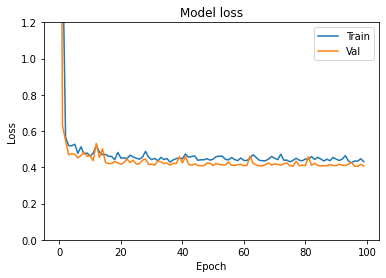

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

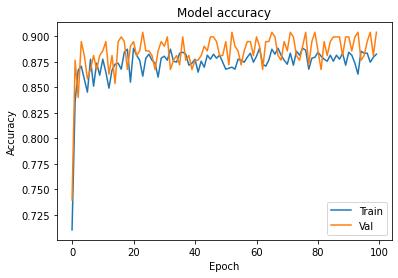

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#Task 1 [5 points] 
Complete the requirements in the attached presentation. 

#Task 2 [5 points]

- Fit a neural network to Heart Attack dataset (https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility/notebooks) used in the logistic regression lab. [3 points]  

- Experiment with different network architectures and hyperparameters to improve the performance. [2 points]

- [Bonus] Compare to the results you previously obtained from fitting a logistic regression model. [+2 points]  

#References
- https://github.com/josephlee94/intuitive-deep-learning/blob/master/Part%201:%20Predicting%20House%20Prices/Coding%20Companion%20for%20Intuitive%20Deep%20Learning%20Part%201%20Annotated.ipynb 

- https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ 

- https://deeplearningdemystified.com/article/fdl-3

- Stanford CS class CS231n: Convolutional Neural Networks for Visual Recognition http://cs231n.github.io/neural-networks-1/

